## Influence of religion in crime rates and political parties in US electorade.
The idea of this little research is to see if there is any correlation between the religiosity of a state and its
preference to a certain political party and also with its crime rates. Therefore, the region of study is limited to the Region of United States of America (The country) by states. 

Datasets:
I found different sources of data related with religion, politics demographic and finally, crime rates. It is important to mention that I did'nt found this tables extremely accurate (in my opinion) since there are factors that are similar and do not match each other in a significant way when I consider they should.

* https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity
* https://www.pewforum.org/religious-landscape-study/compare/belief-in-god/by/state/
* https://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/
* https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate

### Import modules

In [1]:
from csv import reader
import csv
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set()

### Writting some routines for reading files or tables

In [2]:
def readCrimebyState():
    lines = []
    with open("data/crimebystate.txt") as csvfile:
        # create a csv reader object
        csv_reader = reader(csvfile)
        counter = 0
        for line in csv_reader:
            if counter >= 5:
                lines.append(line)
            counter += 1

        header = ["state", "city", 
                  "population", 
                  "totalviolentcrime", "murder","rape" ,"robber", "assault","totalprivatecrime", "bulgary", "larcery", "vehicle", "arson"]


        return pd.DataFrame([line[0].strip().split("\t") for line in lines], columns=header)
    
def getDataByReligiosity():
    lines = []
    with open("data/religosityByState.txt") as csvfile:
        # create a csv reader object
        csv_reader = reader(csvfile)
        counter = 0
        for line in csv_reader:
            if counter >= 4:
                lines.append(line)
            counter += 1
        
        header = ["state", "rank by population", 
                  "percentage stating that religion is very important", 
                  "Rank by religiosity", "Percent religious"]
        return pd.DataFrame([line[0].strip().split("\t") for line in lines], columns=header)

def readTxtFile(filename):
    headers = []
    lines = []
    with open(filename) as csvfile:

        # create a csv reader object
        csv_reader = reader(csvfile)
        # extract headers
        headers = [x.strip() for x in next(csv_reader)]
        # go over each line 
        for line in csv_reader:
            lines.append(line)
        
    return pd.DataFrame(data=[line[0].split(sep="\t") for line in lines], columns=headers[0].split(sep="\t"))


In [3]:
def cleanValue(x):
    try: 
        return float(x)
    except:
        return np.nan

### Religion dataset
Two data set were found about religion.
The first one could be seen in the files of this repository with the name of "beliefInGod.txt".

In the following cell can be observed the raw dataset, apparently it comprised the results from a survey about religion. The columns tells about the percentage of belief in God of people in each state. As it can be seen, 
there are different levels of certainty. 

Since the main goal of this little research is to look for the religion influence in other matters, only the
"Believe in God; absolutely certain" was chosen, merely because it offered the group of people with most
conviction in God and therefore, in religion. 

One of the implicit hypothesis statements is that states with higher percentage of people that truly beleive in 
God has a higher probability of a certain political party and also, as society tend to be safer that those ones 
that don't have most of the religous people. 

In [4]:
# Reading file
belief_in_god_df = readTxtFile(filename='data/beliefInGod.txt')
belief_in_god_df.head()

,State,Believe in God; absolutely certain,Believe in God; fairly certain,Believe in God; not too/not at all certain,Believe in God; don't know,Do not believe in God,Other/don't know if they believe in God,Sample Size
0,Alabama,82%,12%,2%,1%,2%,2%,511
1,Alaska,55%,24%,5%,1%,12%,3%,310
2,Arizona,62%,20%,6%,< 1%,10%,2%,653
3,Arkansas,77%,15%,2%,< 1%,4%,1%,311
4,California,54%,22%,8%,1%,12%,2%,3


#### Cleaning and data selection:

All columns are deleted except two. Column names are changed and strings numbers are converted to integer type. 

In [5]:
belief_in_god_df = readTxtFile(filename='data/beliefInGod.txt').drop(['Sample Size'], axis=1).applymap(lambda x: re.sub("%", "", x))\
                                            .rename(columns = {'State':'state', "Believe in God; absolutely certain":"percentage believe in god"}) \
                                            [["state", "percentage believe in god"]]

belief_in_god_df["percentage believe in god"] = belief_in_god_df["percentage believe in god"].map(lambda x: int(x))
belief_in_god_df.head()

,state,percentage believe in god
0,Alabama,82
1,Alaska,55
2,Arizona,62
3,Arkansas,77
4,California,54


#### There is also a second dataframe about religion.
This one is more focused in a term called religiosity, which what it was considered as it encompassed the attendance of the church and the
willingness of go to a religious events of the people. 

Columns:
* state: State of US.
* rank by population: general population rank
* percentage stating that religion is very important: it is self-explanatory but also, it is important to make emphasis that this not necessary implies someone believe in God or not, just that the person considers religion important for society. 
* Rank by reliogisity: this column it is related with the statement explained above about religiosity.
* Percent religious: percentage of religous people in the state.

In [6]:
getDataByReligiosity().head()

,state,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious
0,California,1,73%,45,73%
1,Texas,2,86%,13,82%
2,Florida,3,78%,36,76%
3,New York,4,72%,43,73%
4,Illinois,5,77%,30,78%


#### Cleaning and data selection:

Special symbols and nan values are deleted. Column names changes. 

In [7]:
religiosity_df = getDataByReligiosity().replace("—",np.nan).dropna()
religiosity_df = religiosity_df.applymap(lambda x: re.sub("%", "", x))
religiosity_df = religiosity_df.set_index("state")
religiosity_df = religiosity_df[["rank by population", "percentage stating that religion is very important", "Rank by religiosity", "Percent religious"]].applymap(lambda x: int(x))
religiosity_df = religiosity_df.reset_index()
religiosity_df.head()

,state,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious
0,California,1,73,45,73
1,Texas,2,86,13,82
2,Florida,3,78,36,76
3,New York,4,72,43,73
4,Illinois,5,77,30,78


#### Both religion datasets are merged

In [8]:
religion_df = pd.merge(belief_in_god_df, religiosity_df, on="state")
religion_df.head()

,state,percentage believe in god,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious
0,Alabama,82,23,90,6,88
1,Alaska,55,48,70,52,69
2,Arizona,62,15,75,44,73
3,Arkansas,77,33,86,10,82
4,California,54,1,73,45,73


### Datasate of party affliliation for each state in United States

Columns:
* state: State in US. 
* Republican/lean Rep.: Percentange of people in favor of republican party in each state. 
* No lean: Percentage of people not in favor with either democrat or republican party. 
* Democrat/lean Dem.: Percentage of people in favor of democrat party in each state
* Sample Size: Quantity of people took the survey in each state.

In [9]:
readTxtFile(filename='data/partyAffiliation.txt').head()

,State,Republican/lean Rep.,No lean,Democrat/lean Dem.,Sample Size
0,Alabama,52%,13%,35%,511
1,Alaska,39%,29%,32%,310
2,Arizona,40%,21%,39%,653
3,Arkansas,46%,16%,38%,311
4,California,30%,21%,49%,3


#### Cleaning and data selection:

Special symbols and nan values are deleted. Column names changed.

In [10]:
party_affiliation_df = readTxtFile(filename='data/partyAffiliation.txt').drop(["Sample Size"], axis=1).applymap(lambda x: re.sub("%", "", x)) \
                                                .rename(columns= {"State": "state", "Republican/lean Rep.": "republicans", "No lean":"neither", "Democrat/lean Dem.": "democrats"})

party_affiliation_df[["republicans", "neither", "democrats"]] = party_affiliation_df[["republicans", "neither", "democrats"]].applymap(lambda x: int(x))
party_affiliation_df.head()

,state,republicans,neither,democrats
0,Alabama,52,13,35
1,Alaska,39,29,32
2,Arizona,40,21,39
3,Arkansas,46,16,38
4,California,30,21,49


### Merge between religion and politics

In [11]:
religion_politics_df = pd.merge(religion_df, party_affiliation_df)
religion_politics_df = religion_politics_df.sort_values("Percent religious")
religion_politics_df.head()

,state,percentage believe in god,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious,republicans,neither,democrats
45,Vermont,41,51,57,56,63,29,14,57
29,New Hampshire,43,43,60,55,64,35,20,44
47,Washington,55,13,67,54,68,33,23,44
21,Massachusetts,40,14,63,53,68,27,17,56
1,Alaska,55,48,70,52,69,39,29,32


The goal is to find a trend or a clear behaivor in US electorade according to their religiosity. The first feature to
be analysed is the percentage stating that religion is very important. 

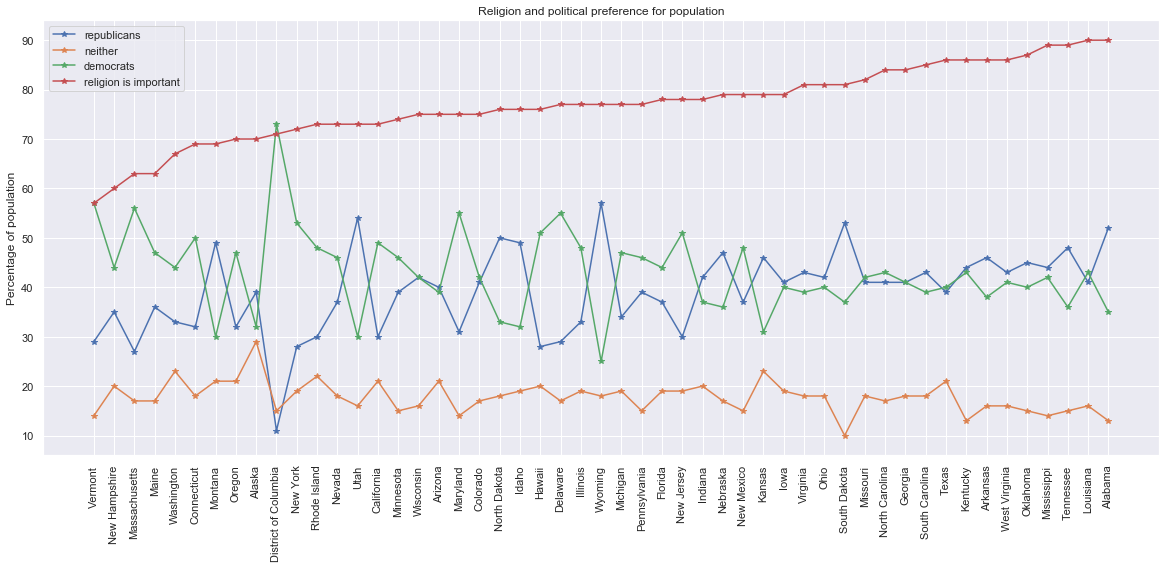

In [12]:
variable = "percentage stating that religion is very important"
legend = ["republicans", "neither", "democrats", variable]
religion_politics_df = pd.merge(religion_df, party_affiliation_df)
religion_politics_df = religion_politics_df.sort_values(variable)
index = range(0,len(religion_politics_df))
plt.figure(figsize=(20,8))
for label in legend:
    plt.plot(index, religion_politics_df[label], '-*')
plt.legend(["republicans", "neither", "democrats", "religion is important"])
plt.ylabel("Percentage of population")
plt.title("Religion and political preference for population")
plt.xticks(index, religion_politics_df["state"], rotation='vertical')
plt.show()

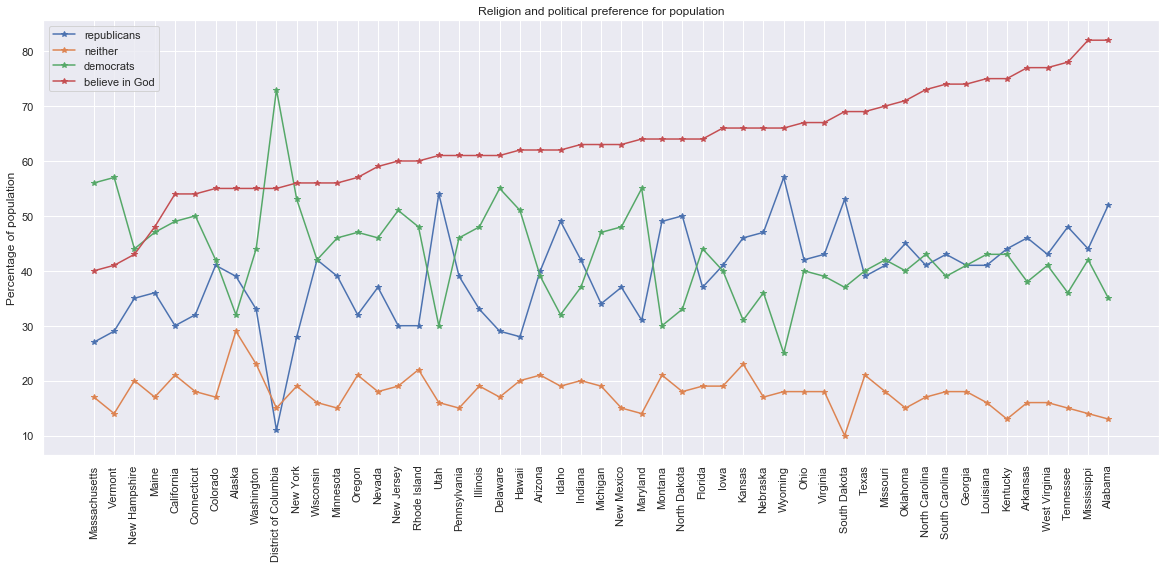

In [13]:
variable = "percentage believe in god"
legend = ["republicans", "neither", "democrats", variable]
religion_politics_df = pd.merge(religion_df, party_affiliation_df)
religion_politics_df = religion_politics_df.sort_values(variable)
index = range(0,len(religion_politics_df))
plt.figure(figsize=(20,8))
for label in legend:
    plt.plot(index, religion_politics_df[label], '-*')
plt.legend(["republicans", "neither", "democrats", "believe in God"])
plt.ylabel("Percentage of population")
plt.title("Religion and political preference for population")
plt.xticks(index, religion_politics_df["state"], rotation='vertical')
plt.show()

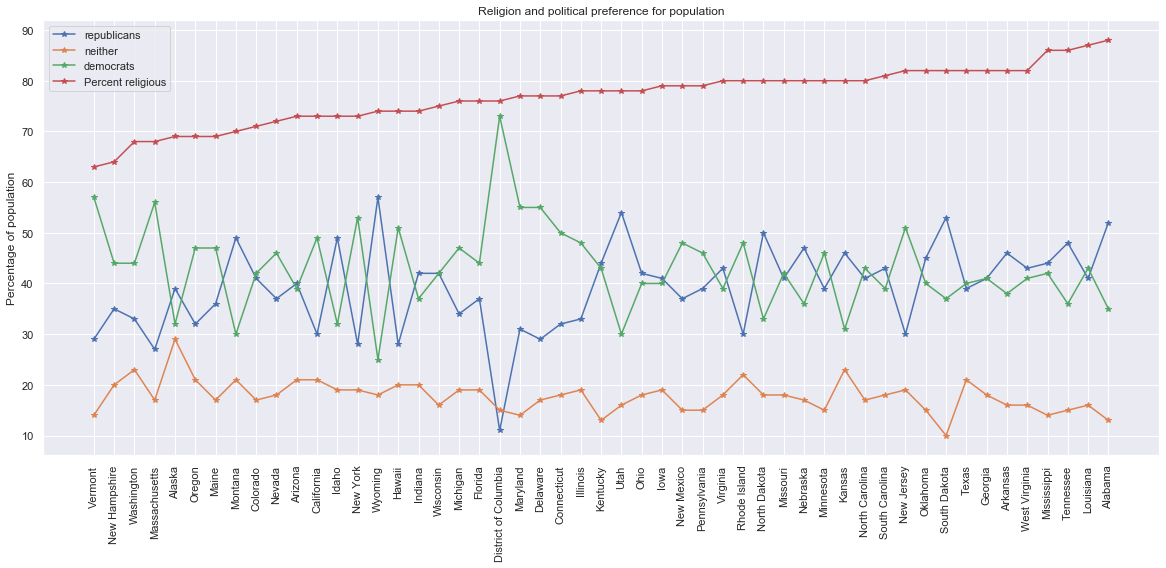

In [14]:
variable = "Percent religious"
legend = ["republicans", "neither", "democrats", variable]
religion_politics_df = pd.merge(religion_df, party_affiliation_df)
religion_politics_df = religion_politics_df.sort_values(variable)
index = range(0,len(religion_politics_df))
plt.figure(figsize=(20,8))
for label in legend:
    plt.plot(index, religion_politics_df[label], '-*')
plt.legend(["republicans", "neither", "democrats", variable])
plt.ylabel("Percentage of population")
plt.xticks(index, religion_politics_df["state"], rotation='vertical')
plt.title("Religion and political preference for population")
plt.show()

After plotting the religion features vs the lean of political parties in population. The results were not expected,
because apparently there is no a significant correlation or influence in religion over the state population political
preference. 

It is important to mention that data has been sorted by the religion variable in each chart, with the intention to 
make easier the visualization of the expeting but non-existing trend. 

## Religion vs Crime

#### Crime dataset

It comprises all crimes registered by FBI by cities, it makes a distinction between the different types of them, 
for example, property crimes and violent crimes. 

For this little research, all crimes are considered equal and in consequence, they are gonna by summed to get
a global number of murder by state. 

Besides, all numerical columns are going to be casted to floats, special characters removed. All crimes are going to
be grouped by states through a group by.

North Carolina is going to be deleted because it lacks of data due to particular law of that state. 

In [15]:
readCrimebyState().head()

,state,city,population,totalviolentcrime,murder,rape,robber,assault,totalprivatecrime,bulgary,larcery,vehicle,arson
0,Alabama,Mobile3,248431,740.25,20.13,57.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
1,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
2,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,None
3,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39
4,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,3426.36,466.56,19.26


In [16]:
crime_df = readCrimebyState().replace(to_replace='None', value=np.nan)
# Deleting North Caroline
crime_df = crime_df[crime_df["state"] != "North Carolina8"]
# Converting numerical columns into float datatype
crime_df[["population", "totalviolentcrime", "totalprivatecrime"]] = crime_df[["population", "totalviolentcrime", "totalprivatecrime"]].applymap(cleanValue).dropna()
# Getting total number of crimes registered in each state
crime_df["crimes"] = crime_df["totalviolentcrime"] + crime_df["totalprivatecrime"]
t = crime_df[["state", "crimes"]].groupby(["state"]).sum() 
crime_df = crime_df[["state", "population"]].groupby(["state"]).sum() 
crime_df.head()

,population
state,
Alabama,248431.0
Alaska,296188.0
Arizona,3661326.0
California,12197770.0
Colorado,1547592.0


In [17]:
crime_df = readCrimebyState().replace(to_replace='None', value=np.nan)
crime_df[["population", "totalviolentcrime", "totalprivatecrime"]] = crime_df[["population", "totalviolentcrime", "totalprivatecrime"]].applymap(cleanValue).dropna()
crime_df = crime_df[crime_df["state"] != "North Carolina8"]

# Getting total number of crimes registered in each state
crime_df["crimes"] = crime_df["totalviolentcrime"] + crime_df["totalprivatecrime"]
t = crime_df[["state", "crimes"]].groupby(["state"]).sum() 
print(t.head())

# With a similar procedure, population of each city were group to make an estimate of population for each state. 
crime_df = crime_df[["state", "population"]].groupby(["state"]).sum() 
print("----------------------")
print(crime_df.head())
crime_df = pd.merge(crime_df, t, on="state")
crime_df = crime_df.reset_index()
crime_df.head()

              crimes
state               
Alabama      6194.08
Alaska       6619.11
Arizona     24481.21
California  64772.27
Colorado    11695.65
----------------------
            population
state                 
Alabama       248431.0
Alaska        296188.0
Arizona      3661326.0
California  12197770.0
Colorado     1547592.0


,state,population,crimes
0,Alabama,248431.0,6194.08
1,Alaska,296188.0,6619.11
2,Arizona,3661326.0,24481.21
3,California,12197770.0,64772.27
4,Colorado,1547592.0,11695.65


Since states have different population levels, it important to make some type of regulation to reduce inconsistent
results, therefore, crime total values were divided by population of each state to get a ratio. 

In [18]:
crime_df["crime_ratio"] = crime_df["crimes"] / crime_df["population"]
crime_df.head()

,state,population,crimes,crime_ratio
0,Alabama,248431.0,6194.08,0.024933
1,Alaska,296188.0,6619.11,0.022348
2,Arizona,3661326.0,24481.21,0.006686
3,California,12197770.0,64772.27,0.005310
4,Colorado,1547592.0,11695.65,0.007557


#### Merge between religion and crime dataframes 

In [19]:
crime_religion_df = pd.merge(crime_df, religion_df, on="state")
# Crime ration was normalized by dividing the ratio by its max value and then multiplied bt 100. 
# However, in order to favor the visualization the ration was divided again by two, just to reduce the height of
# the bar. 
crime_religion_df["crime_ratio"] = (crime_religion_df["crime_ratio"] / max(crime_religion_df["crime_ratio"])) * 50
crime_religion_df.head()

,state,population,crimes,crime_ratio,percentage believe in god,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious
0,Alabama,248431.0,6194.08,50.000000,82,23,90,6,88
1,Alaska,296188.0,6619.11,44.815797,55,48,70,52,69
2,Arizona,3661326.0,24481.21,13.408910,62,15,75,44,73
3,California,12197770.0,64772.27,10.648971,54,1,73,45,73
4,Colorado,1547592.0,11695.65,15.155381,55,22,75,48,71


Text(0.5, 1.0, 'Religion influence over crime rate')

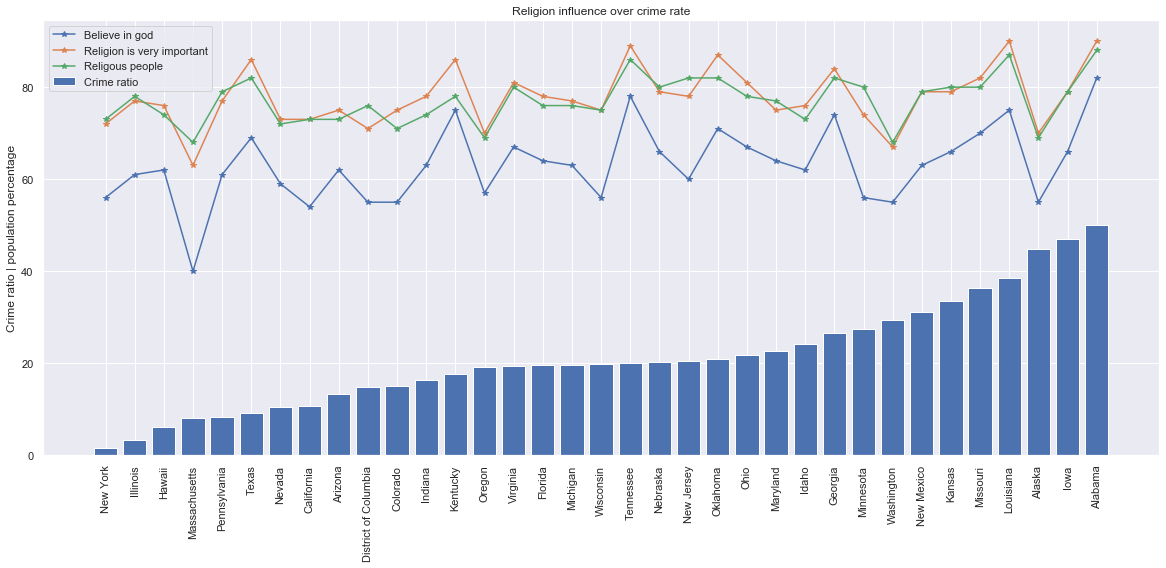

In [20]:
variable = "percentage believe in god"
crime_religion_df = crime_religion_df.sort_values("crime_ratio")
index = range(0,len(crime_religion_df))
plt.figure(figsize=(20,8))
plt.xticks(index, crime_religion_df["state"], rotation='vertical')

plt.ylabel("Crime ratio | population percentage")

for x in ["percentage believe in god", "percentage stating that religion is very important", "Percent religious"]:
    plt.plot(index, crime_religion_df[x], '-*')
plt.bar(index, crime_religion_df["crime_ratio"])
plt.legend(["Believe in god", "Religion is very important", "Religous people", "Crime ratio"])
plt.title("Religion influence over crime rate")

Finally, the correlation between crime ratio and the percentage of population that truly beleive in god,
just to see the number, since it there was no significant influence in religion over crime in the graph.

As it can be expected the correlation was only 0.41 (the highest between all features related with religion)

In [21]:
corr, _ = pearsonr(crime_religion_df["crime_ratio"], crime_religion_df["percentage believe in god"])
corr

0.4143967068481292

## Conclusion
With the present data, it seems religion does not imply a strong or even a considerable influence over political 
issues or crime rate. The pearson correlation between the Crime ratio and the percentage believe in god was only 
0.41. Correlation between religions columns was high in general, which means they have similar behaivor. 

Percentange believe in god feature offered the highest correlation with the crime rate. 


## About Cairo's principles

### truthfulness
* Graph were presented in a manner that show just the needed information by advoiding chart junk. It can be concluded
that the autor intentions of this micro research were not to create misleading interpretations of the data, but 
showing the data in the most understandable manner. 

### beauty
* The beauty of the graph was mainly built with the seaborn sub package of matplolib. 

### functionality
* The autor tried to use bar in strategic places to emphasize the organization of the data and to make easier to follow trends in the charts. 

### insightfulness
The crime rate graph produced a "aha" moment when was compared with an article of crime rate by state in this web site: 
* https://www.al.com/news/2018/11/alabamas-place-on-the-list-of-most-dangerous-states.html